In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

from statsmodels.graphics import tsaplots

import seaborn as sns
sns.set_style('whitegrid')

import yfinance as yf

from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [2]:
# The Big Seven
company_list = ["TSLA", "AAPL", "GOOG", "AMZN", "MSFT", "META", "NVDA"]
company_names = ["TESLA", "APPLE", "MICROSOFT", "AMAZON", "MICROSOFT", "META", "NVIDIA"]

# Download stock data from yfinance
def download_stock(stock):
    df = yf.download(
        [stock],
        start="2010-01-01",
        end="2024-01-01",
        group_by="ticker",
        progress=False
    )
    df.round(4)
    df.insert(loc=0, column="Company", value=stock)
    return df

# Print the general information of the given stock
def info_stock(stock_name, stock_data):
    print(f'{stock_name}\'s Historical Data: \n\n {stock_data} \n\n')
    print(f'{stock_name}\'s Column Information: \n')
    print(stock_data.info(),'\n\n')
    print(f'{stock_name}\'s Statistic Summary: \n\n {stock_data.describe().round(4)}')
    print('-'*75)
    print()


In [3]:
stock_dict = {}
for stock in company_list:
    stock_dict[stock] = download_stock(stock)

for stock_name, stock_data in stock_dict.items():
    info_stock(stock_name, stock_data)

TSLA's Historical Data: 

            Company        Open        High         Low       Close  \
Date                                                                 
2010-06-29    TSLA    1.266667    1.666667    1.169333    1.592667   
2010-06-30    TSLA    1.719333    2.028000    1.553333    1.588667   
2010-07-01    TSLA    1.666667    1.728000    1.351333    1.464000   
2010-07-02    TSLA    1.533333    1.540000    1.247333    1.280000   
2010-07-06    TSLA    1.333333    1.333333    1.055333    1.074000   
...            ...         ...         ...         ...         ...   
2023-12-22    TSLA  256.760010  258.220001  251.369995  252.539993   
2023-12-26    TSLA  254.490005  257.970001  252.910004  256.609985   
2023-12-27    TSLA  258.350006  263.339996  257.519989  261.440002   
2023-12-28    TSLA  263.660004  265.130005  252.710007  253.179993   
2023-12-29    TSLA  255.100006  255.190002  247.429993  248.479996   

             Adj Close     Volume  
Date                      

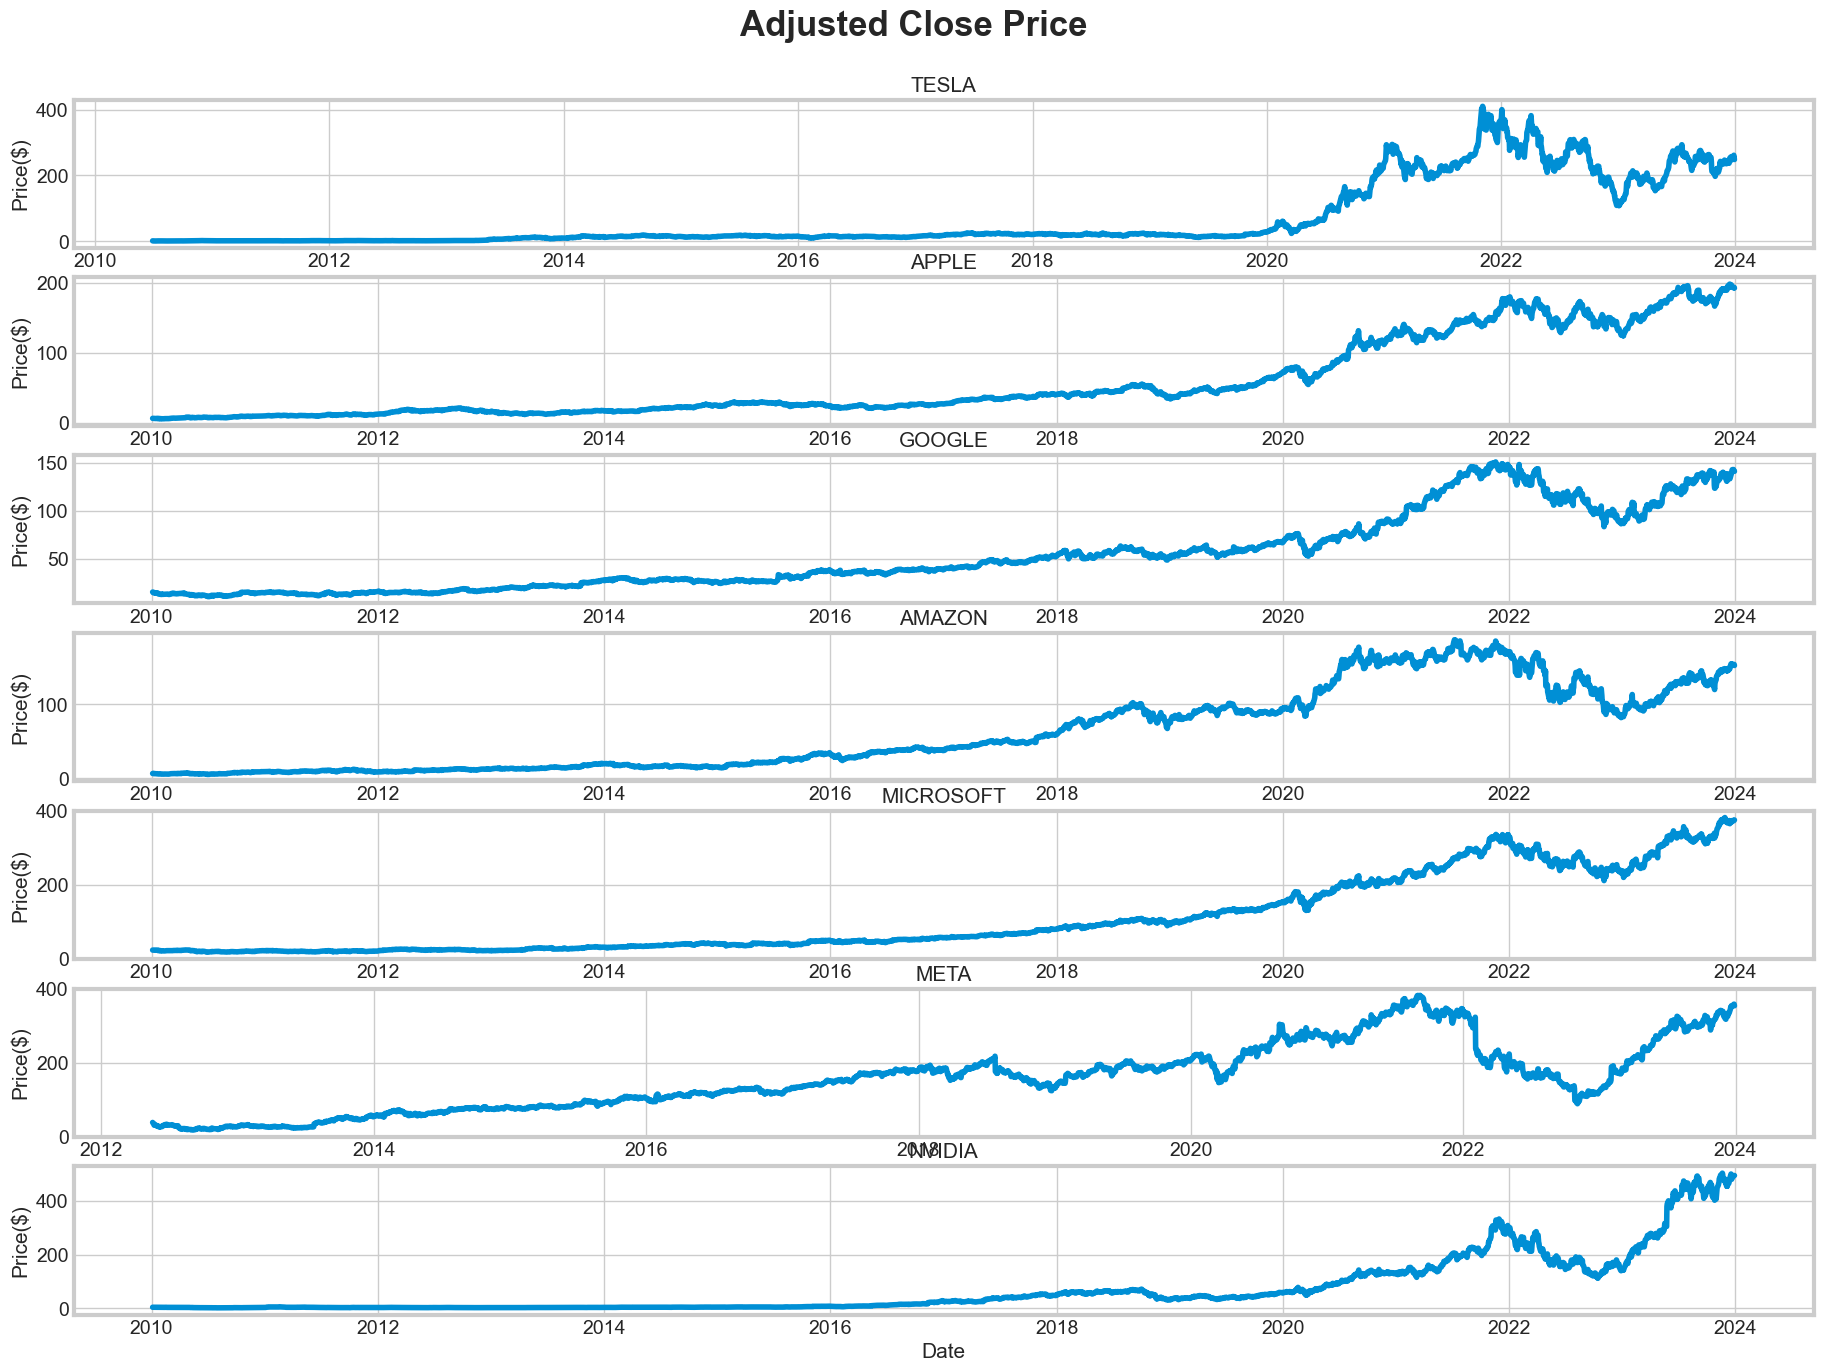

In [4]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))
fontsize = 15

# TESLA
ax[0].plot(stock_dict["TSLA"]['Adj Close'])
ax[0].set_title('TESLA', fontsize=fontsize)
ax[0].set_xlabel('Date', fontsize=fontsize)
ax[0].set_ylabel('Price($)', fontsize=fontsize)

# APPLE
ax[1].plot(stock_dict["AAPL"]['Adj Close'])
ax[1].set_title('APPLE', fontsize=fontsize)
ax[1].set_xlabel('Date', fontsize=fontsize)
ax[1].set_ylabel('Price($)', fontsize=fontsize)

# GOOGLE
ax[2].plot(stock_dict["GOOG"]['Adj Close'])
ax[2].set_title('GOOGLE', fontsize=fontsize)
ax[2].set_xlabel('Date', fontsize=fontsize)
ax[2].set_ylabel('Price($)', fontsize=fontsize)

# AMAZON
ax[3].plot(stock_dict["AMZN"]['Adj Close'])
ax[3].set_title('AMAZON', fontsize=fontsize)
ax[3].set_xlabel('Date', fontsize=fontsize)
ax[3].set_ylabel('Price($)', fontsize=fontsize)

# MICROSOFT
ax[4].plot(stock_dict["MSFT"]['Adj Close'])
ax[4].set_title('MICROSOFT', fontsize=fontsize)
ax[4].set_xlabel('Date', fontsize=fontsize)
ax[4].set_ylabel('Price($)', fontsize=fontsize)

# META
ax[5].plot(stock_dict["META"]['Adj Close'])
ax[5].set_title('META', fontsize=fontsize)
ax[5].set_xlabel('Date', fontsize=fontsize)
ax[5].set_ylabel('Price($)', fontsize=fontsize)

# NVIDIA
ax[6].plot(stock_dict["NVDA"]['Adj Close'])
ax[6].set_title('NVIDIA', fontsize=fontsize)
ax[6].set_xlabel('Date', fontsize=fontsize)
ax[6].set_ylabel('Price($)', fontsize=fontsize)

plt.suptitle('Adjusted Close Price', fontsize=25, fontweight='bold', x=0.5, y=0.94)
plt.show()

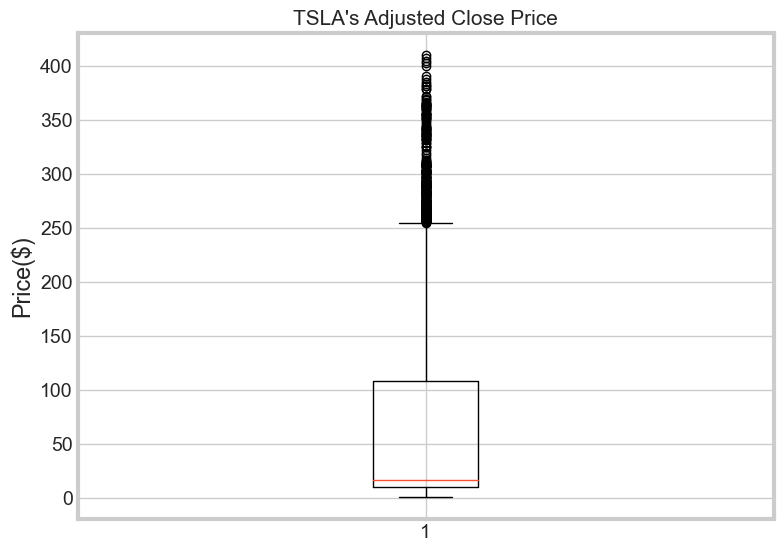

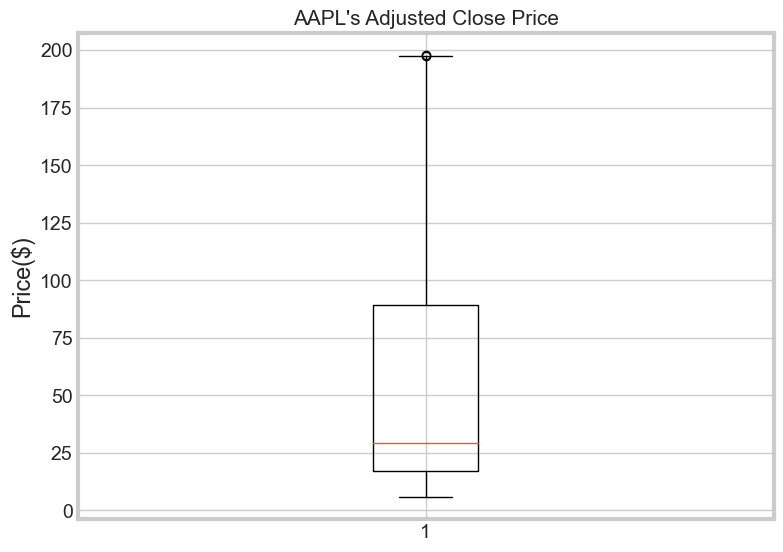

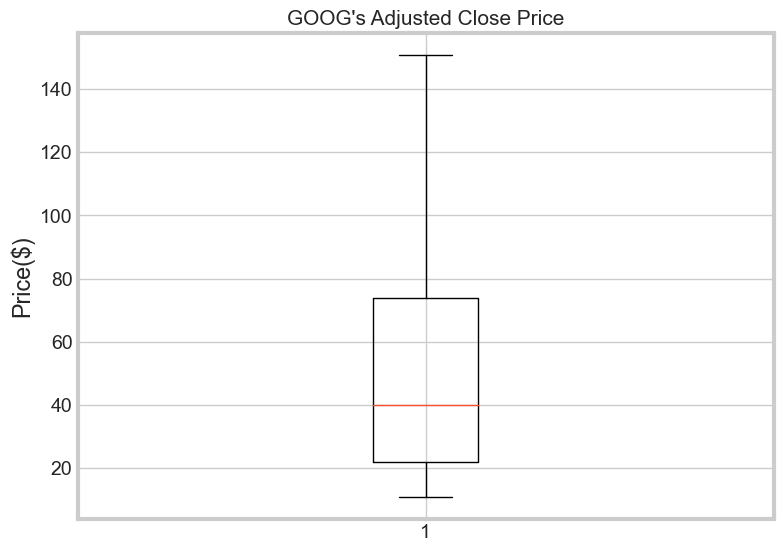

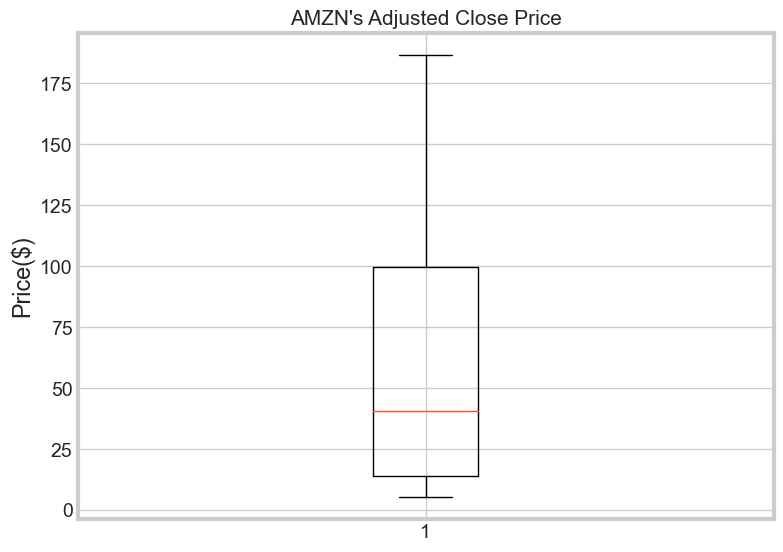

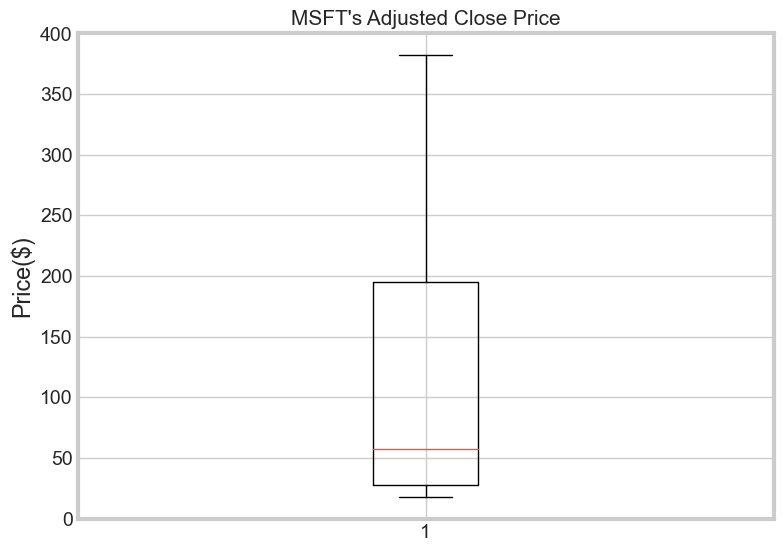

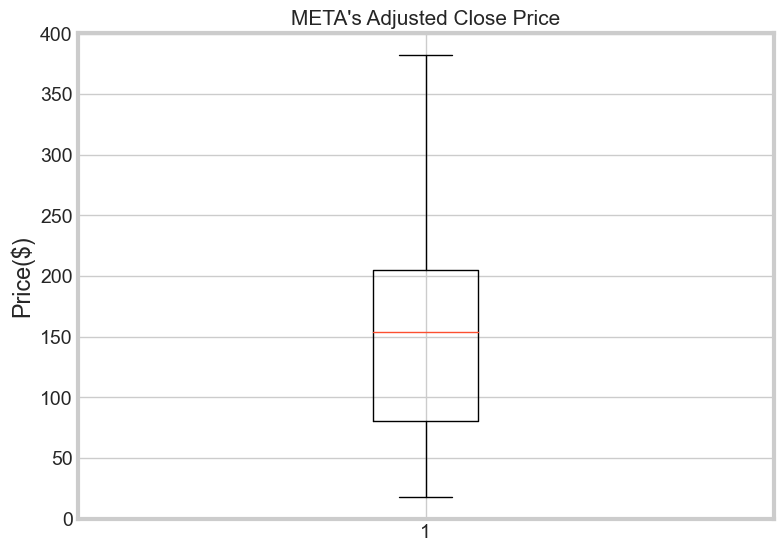

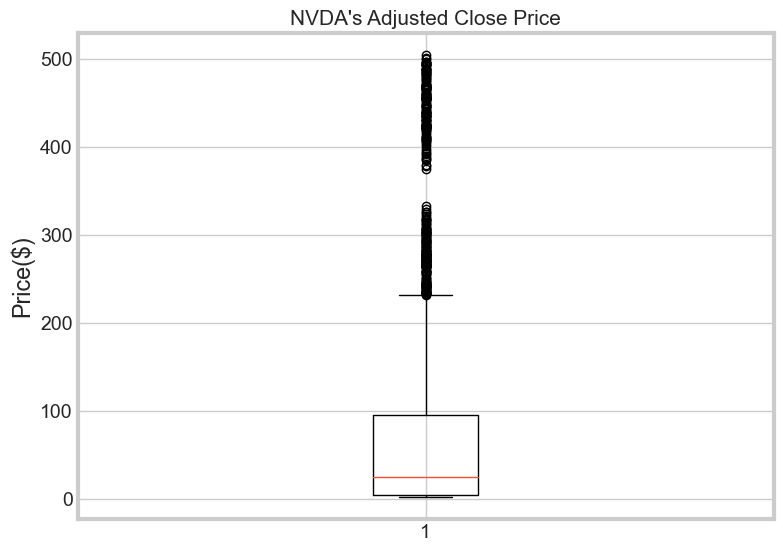

In [5]:
def boxplot_stock(stock_data, stock_name):
    plt.figure(figsize=(8,6))
    plt.boxplot(stock_data['Adj Close'])
    plt.ylabel('Price($)')
    plt.title(f'{stock_name}\'s Adjusted Close Price', fontsize=15)
    plt.show()
    
for stock_name, stock in stock_dict.items():
    boxplot_stock(stock, stock_name)

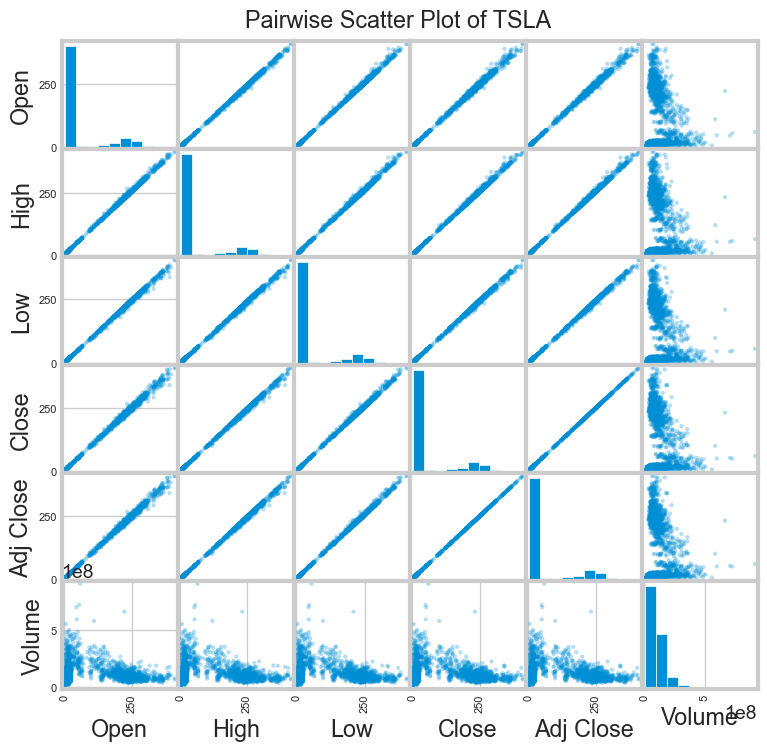

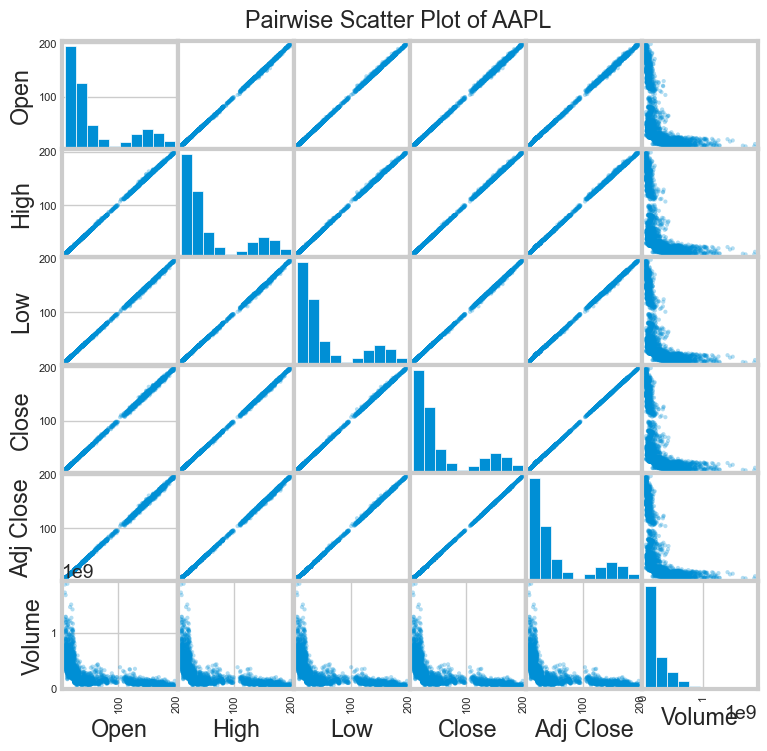

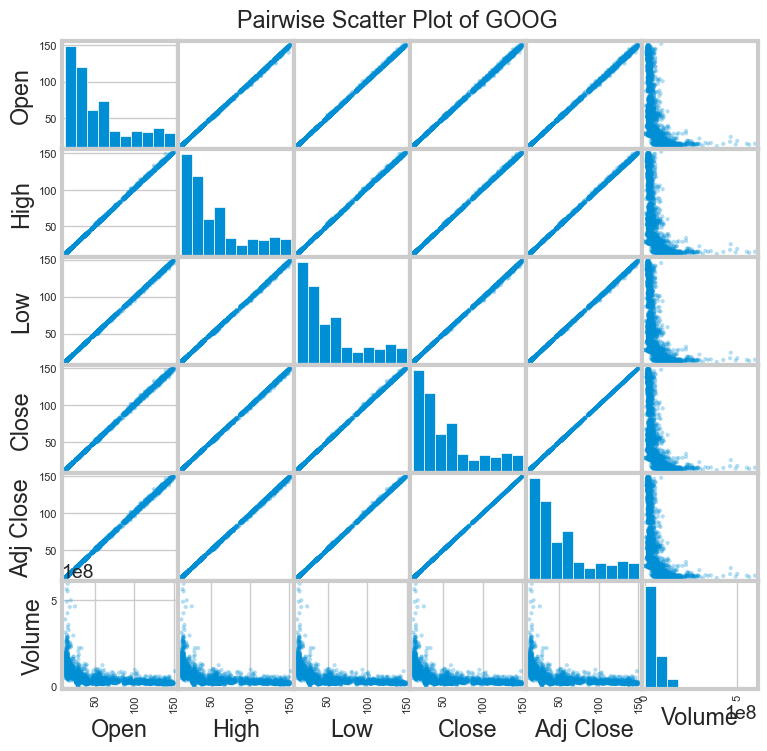

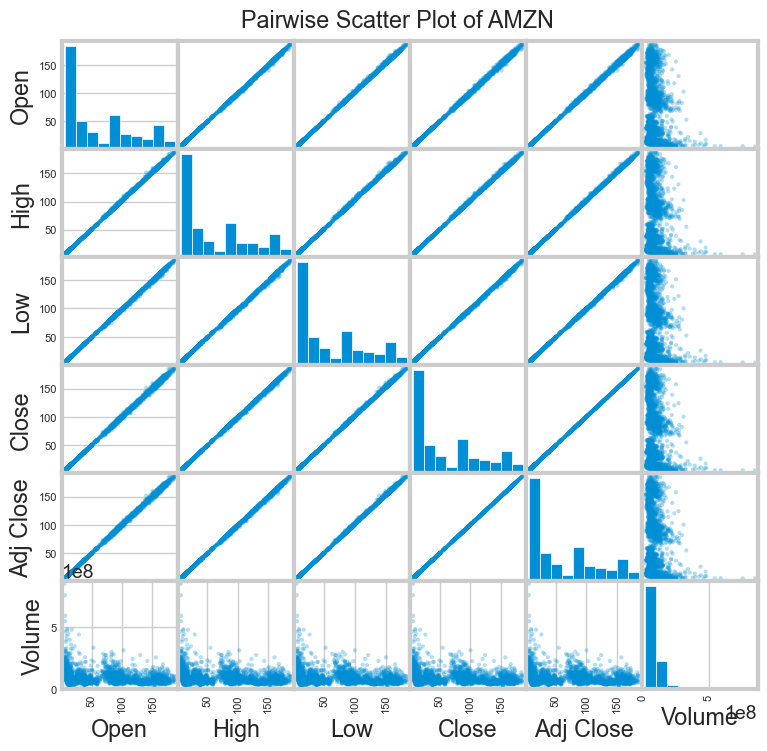

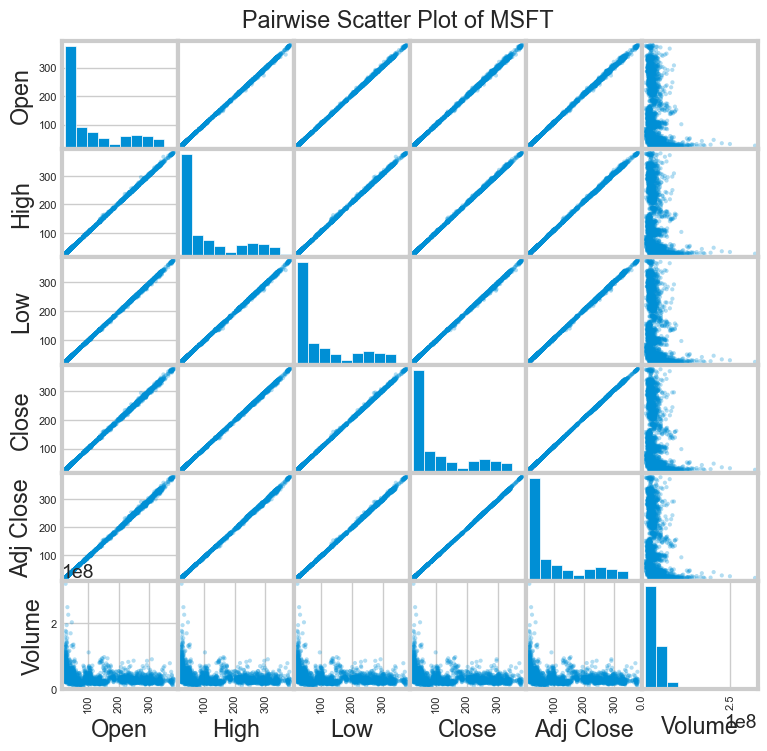

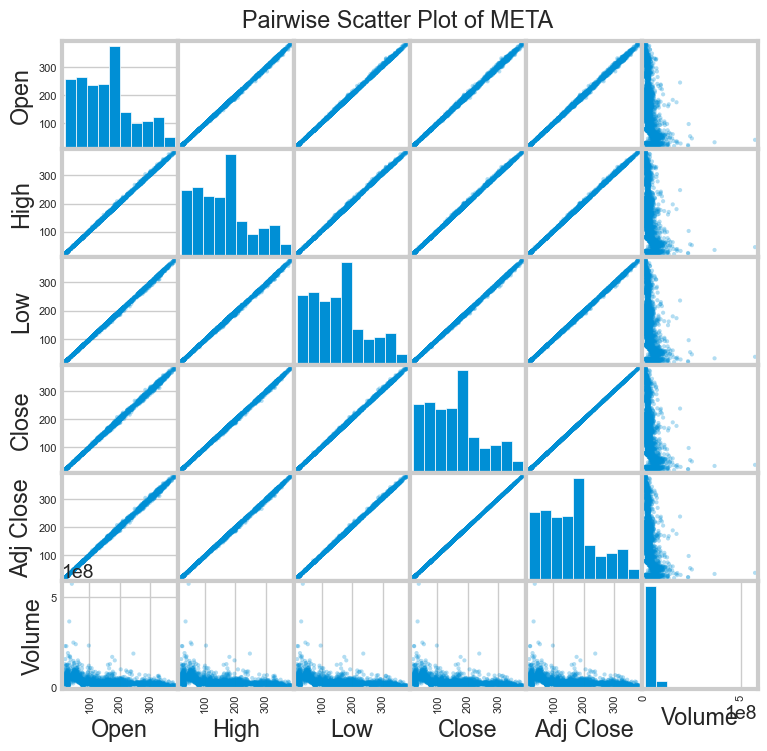

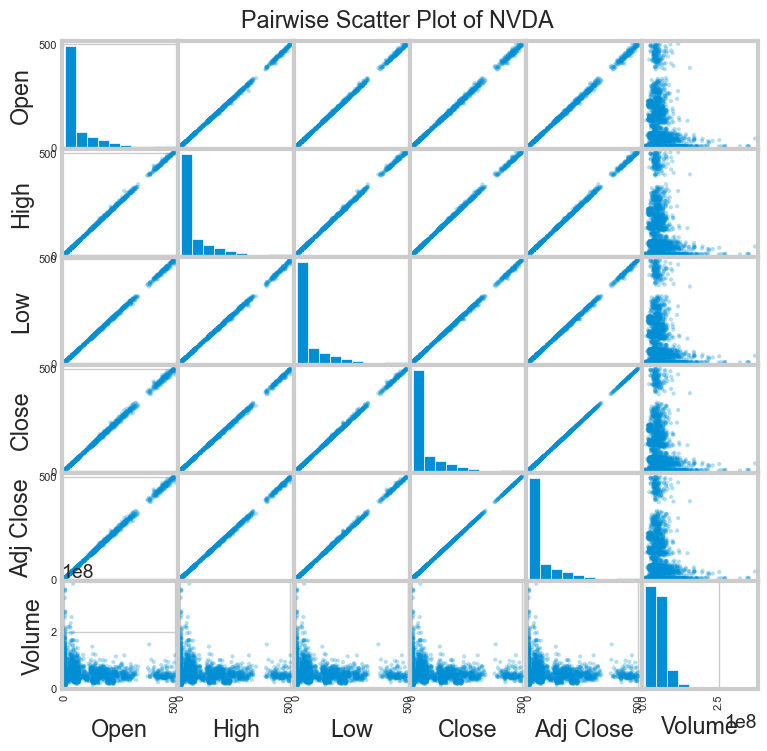

In [6]:
def scatter_matrix(stock_data, stock_name):
    pd.plotting.scatter_matrix(stock_data, figsize=(8,8), alpha=0.3)
    plt.suptitle(f'Pairwise Scatter Plot of {stock_name}', x=0.5, y=0.92)
    plt.show()
    
for stock_name, stock in stock_dict.items():
    scatter_matrix(stock, stock_name)

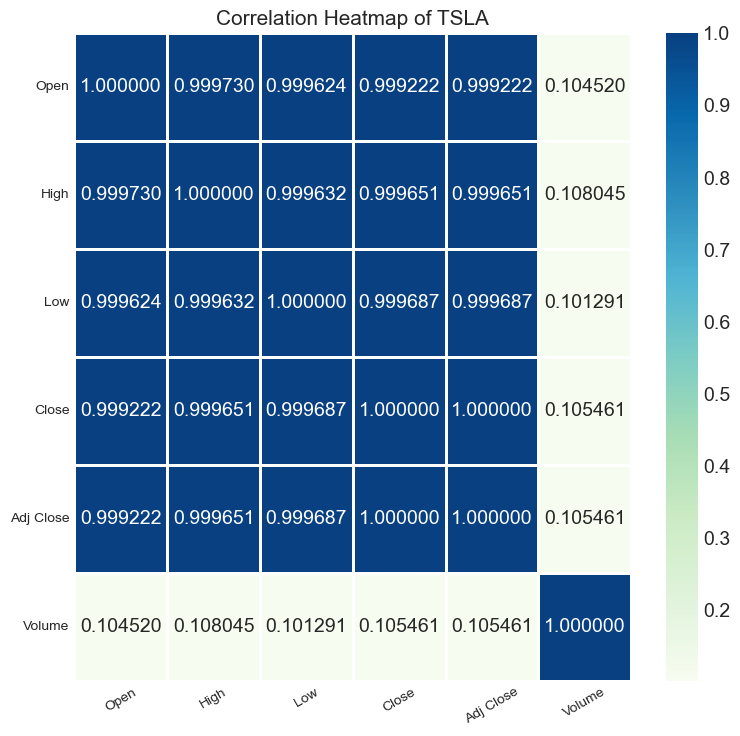

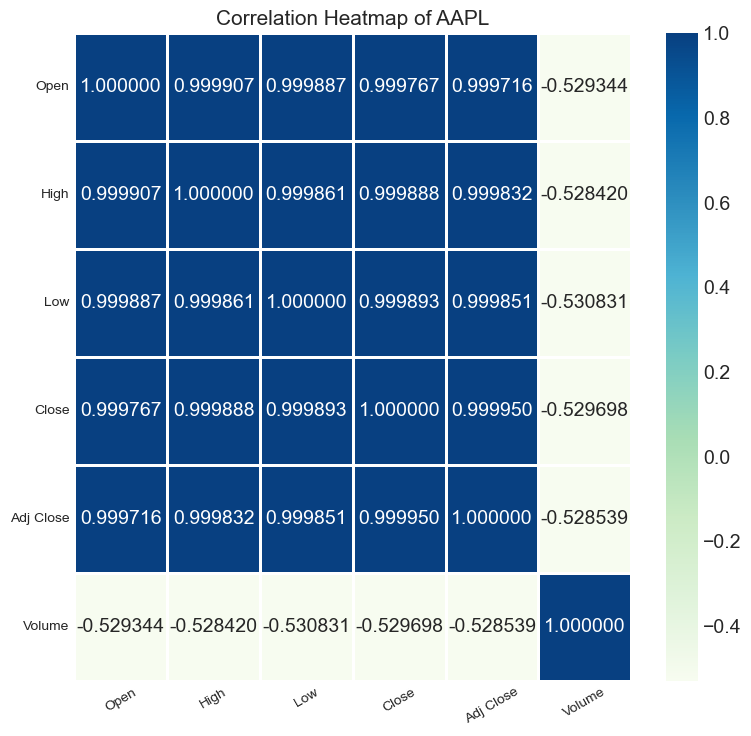

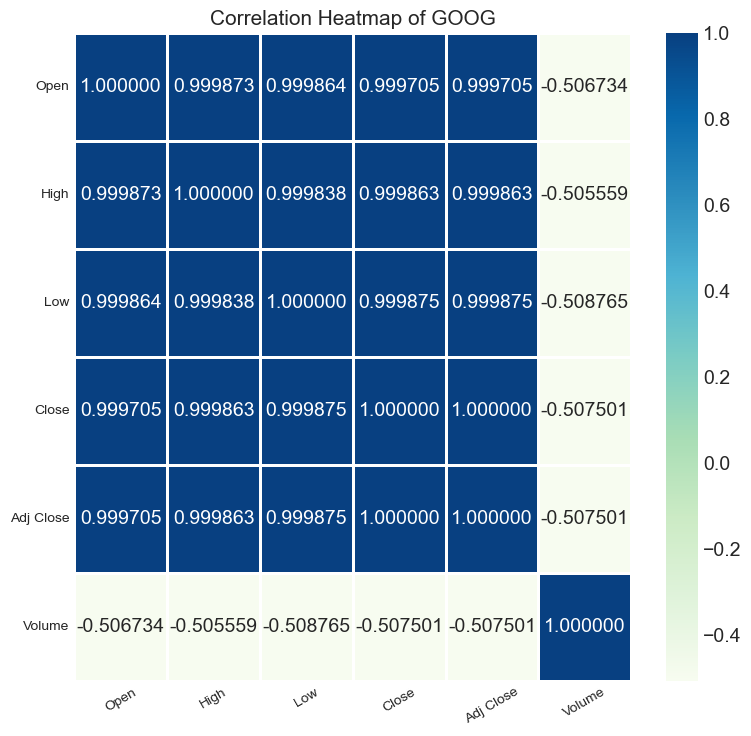

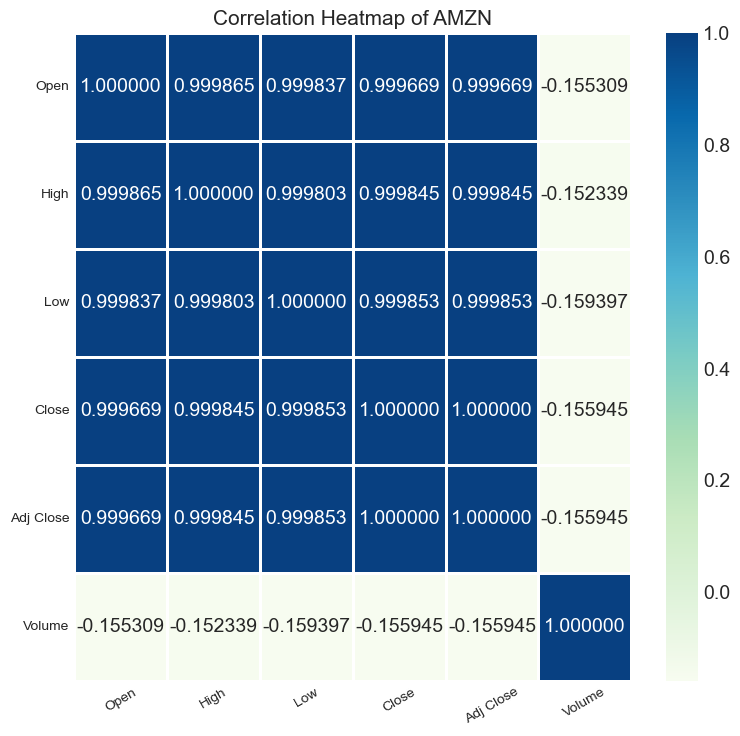

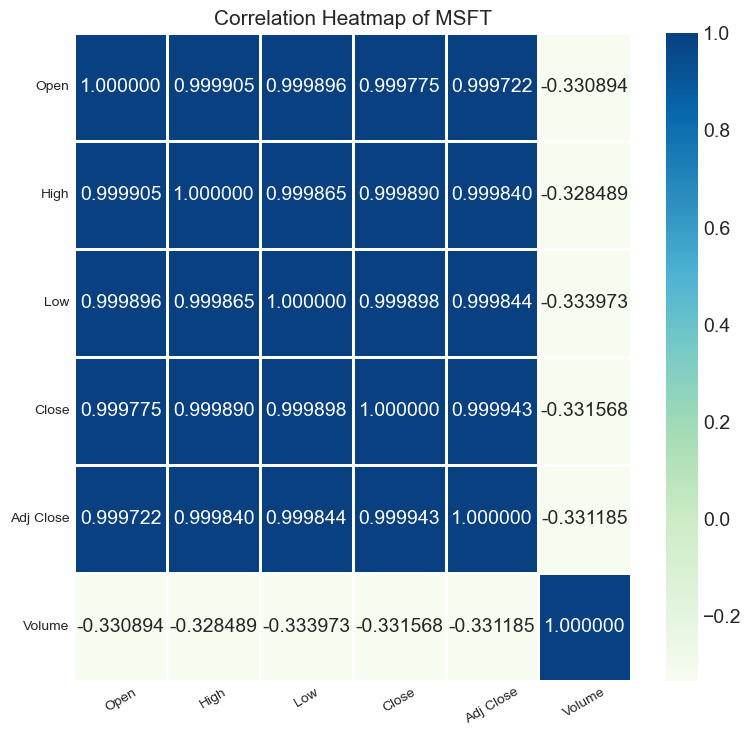

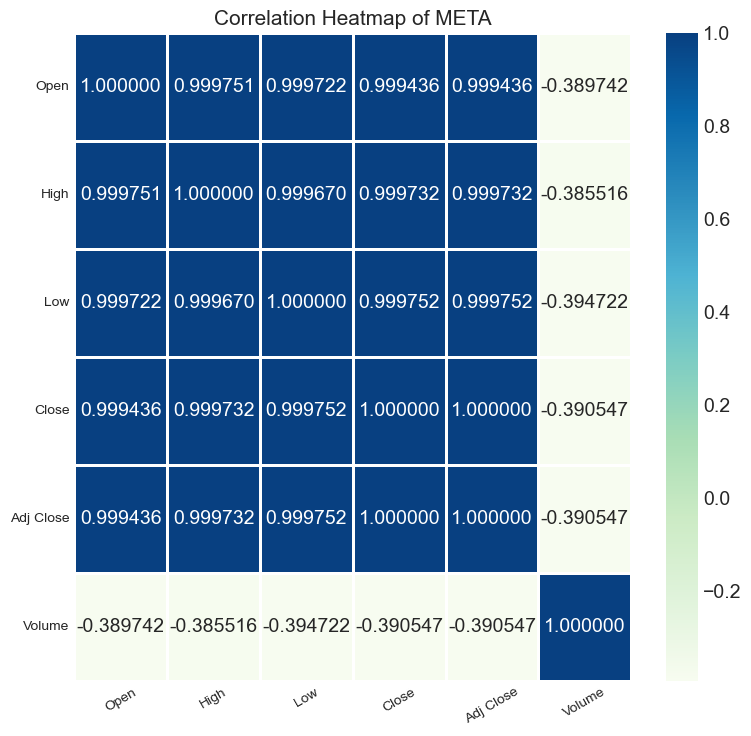

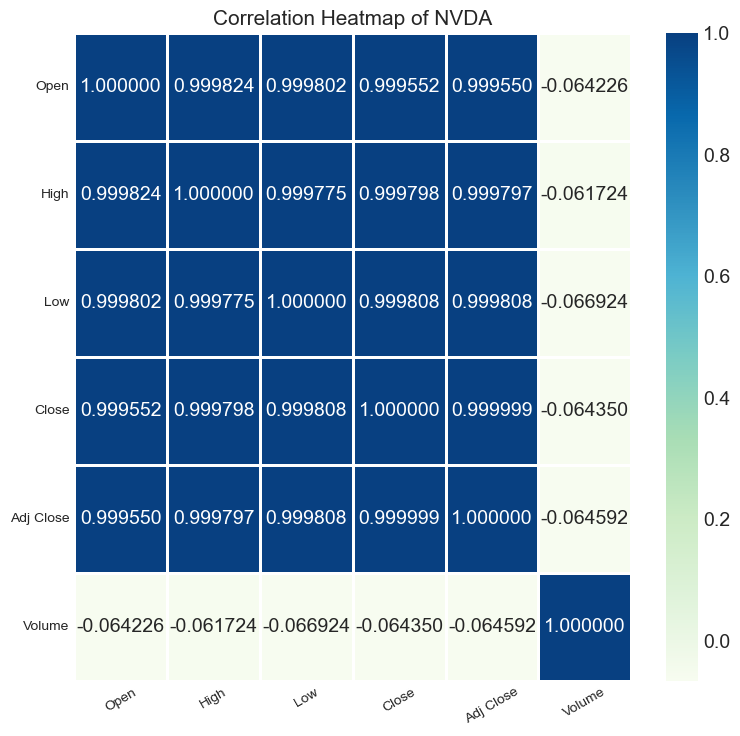

In [7]:
def heat_map(stock_data, stock_name):
    plt.figure(figsize = (8,8))
    sns.heatmap(stock_data.corr(), cmap='GnBu', annot=True, linewidths = 1, fmt='f').set_title(f'Correlation Heatmap of {stock_name}', fontsize=15)
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()
    
for stock_name, stock in stock_dict.items():
    heat_map(stock.drop("Company", axis=1), stock_name)

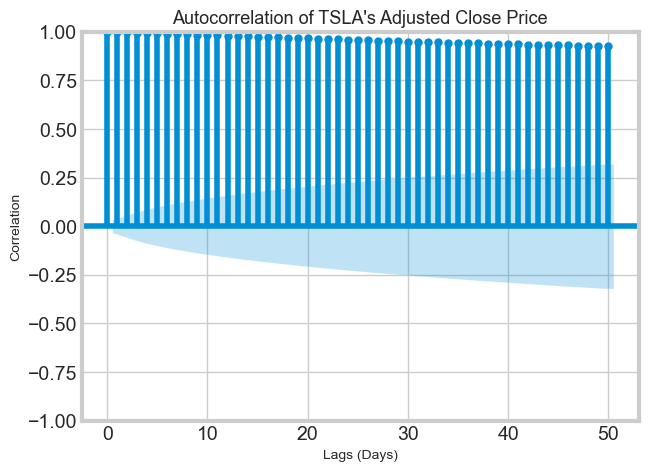

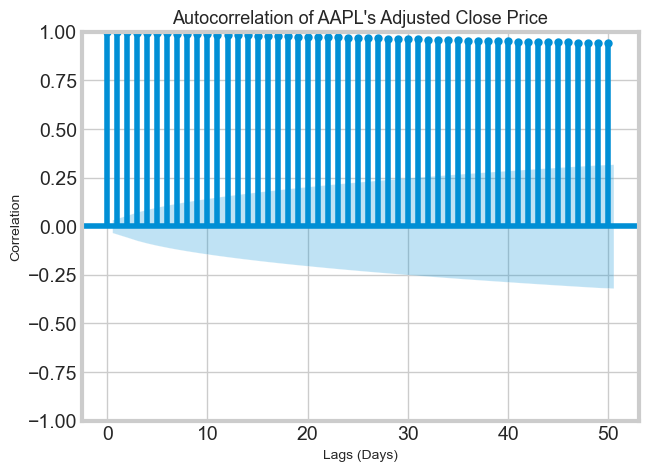

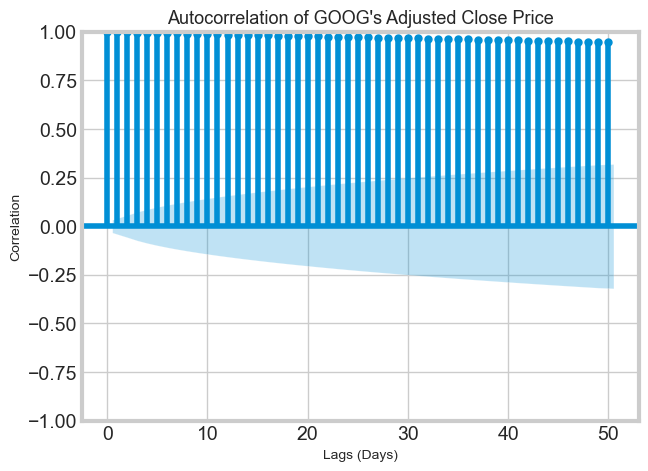

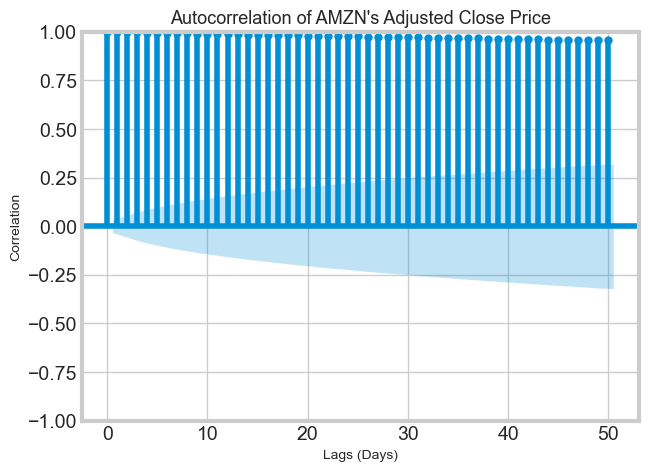

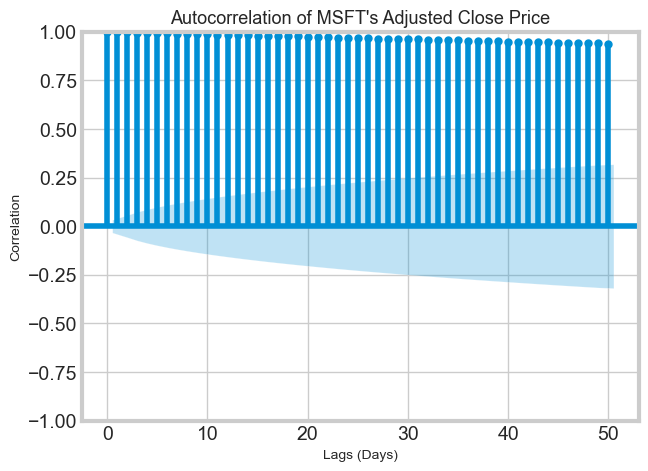

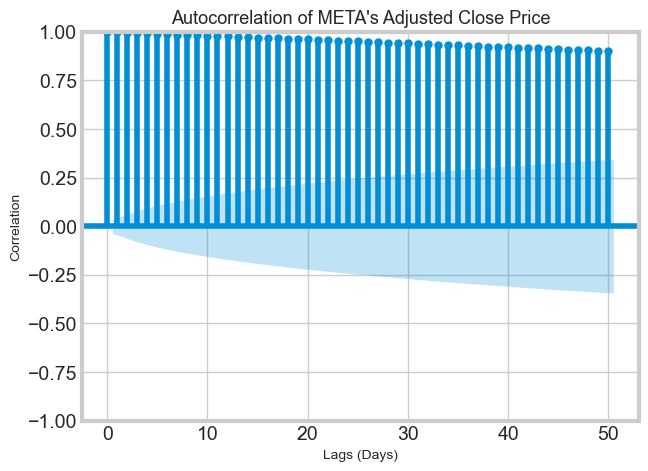

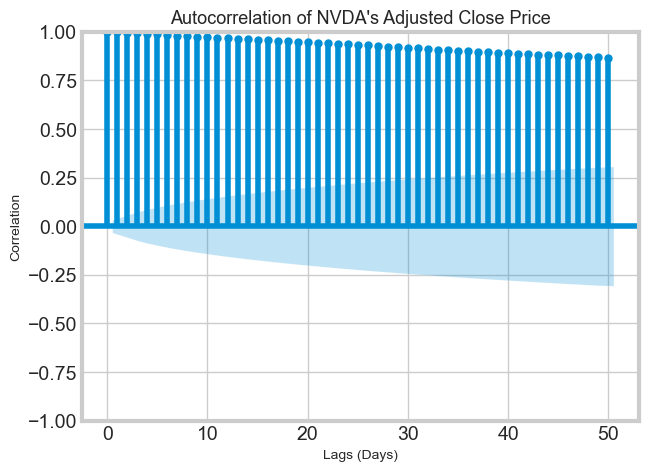

In [8]:
def autocorrelation(stock_data, stock_name):
    tsaplots.plot_acf(stock_data["Adj Close"], lags=50)  
    plt.title(f'Autocorrelation of {stock_name}\'s Adjusted Close Price', fontsize=13)
    plt.xlabel('Lags (Days)', fontsize=10)
    plt.ylabel('Correlation', fontsize=10)
    plt.show()

for stock_name, stock in stock_dict.items():
    autocorrelation(stock, stock_name)